#**Assignment - Clustering**
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000


Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months


Bonus_trans--Number of non-flight bonus transactions in the past 12 months


Flight_miles_12mo--Number of flight miles in the past 12 months


Flight_trans_12--Number of flight transactions in the past 12 months


Days_since_enrolled--Number of days since enrolled in flier program


Award--whether that person had award flight (free flight) or not


**Data**: EastWestAirlines.xlsx

## **Importing Necessary Libraries**

In [26]:
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN 

## **Importing Data**

In [27]:
dataset = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
dataset 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## **Initial Analysis**

In [28]:
dataset.shape

(3999, 12)

In [29]:
dataset.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [30]:
dataset.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [31]:
dataset.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [32]:
dataset = dataset.rename({'ID#':'ID','Award?':'Award'}, axis = 1)

In [33]:
dataset

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


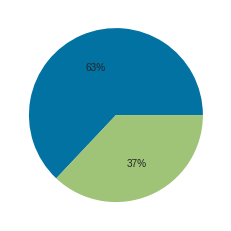

In [40]:
plt.pie(dataset['Award'].value_counts(),autopct='%2.0f%%')
plt.show()

In [34]:
dataset.iloc[:,1:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [35]:
# Normalizing Dataset
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(dataset.iloc[:,1:])
print(scaler_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


## **Hierarchical Clustering**

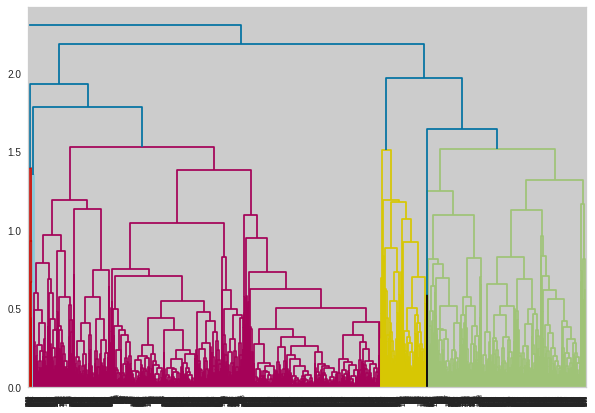

In [36]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=dendrogram(linkage(scaler_df,'complete'))

In [46]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=4)

In [47]:
H_clusters.fit_predict(scaler_df)

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler_df),columns=['clustersid'])

In [49]:
y

,clustersid
0,0
1,0
2,0
3,0
4,3
...,...
3994,1
3995,1
3996,1
3997,0


In [50]:
y['clustersid'].value_counts()

0    1710
1     946
2     808
3     535
Name: clustersid, dtype: int64

In [51]:
# Adding clusters to dataset
dataset['clustersid_HC']=H_clusters.labels_
dataset

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [54]:
dataset.groupby('clustersid_HC').agg(['mean']).reset_index()

,clustersid_HC,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2312.702339,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0
1,1,1889.710359,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
2,2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,1490.760748,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0


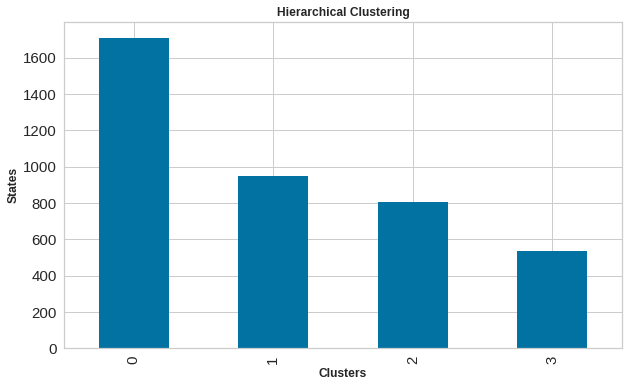

In [55]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
dataset.groupby(['clustersid_HC']).count()['ID'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [56]:
sil_score= silhouette_score(scaler_df, H_clusters.labels_)
sil_score

0.42494300944261365

In [58]:
# States in cluster #0 
dataset[dataset['clustersid_HC']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [59]:
# States in cluster #1
dataset[dataset['clustersid_HC']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1


In [60]:
# States in cluster #
dataset[dataset['clustersid_HC']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
10,11,40091,0,2,1,1,7278,10,0,0,6959,0,2
12,13,43382,0,2,1,1,11150,20,0,0,6924,0,2
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,3995,35185,0,2,1,1,5957,7,0,0,1439,0,2
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2


In [61]:
# States in cluster #3 
dataset[dataset['clustersid_HC']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,3
20,21,120576,0,5,1,1,58831,23,250,2,6896,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,3
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,3


## **K Means**

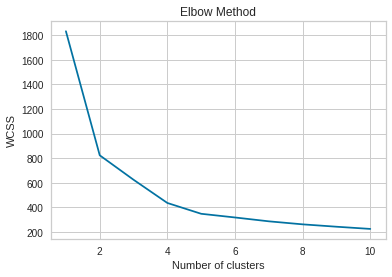

In [62]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
#Build Cluster algorithm

KM_clusters = KMeans(5, random_state=42)
KM_clusters.fit(scaler_df)

KMeans(n_clusters=5, random_state=42)

In [77]:
y=pd.DataFrame(KM_clusters.fit_predict(scaler_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

4    1032
1     868
0     808
2     673
3     618
Name: clusterid_Kmeans, dtype: int64

In [78]:
#Assign clusters to the data set
dataset['clusterid_Kmeans'] = KM_clusters.labels_
dataset

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,4


In [79]:
dataset.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,2.314356
1,1,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,0.258065
2,2,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1.011887
3,3,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,2.000000
4,4,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,0.151163


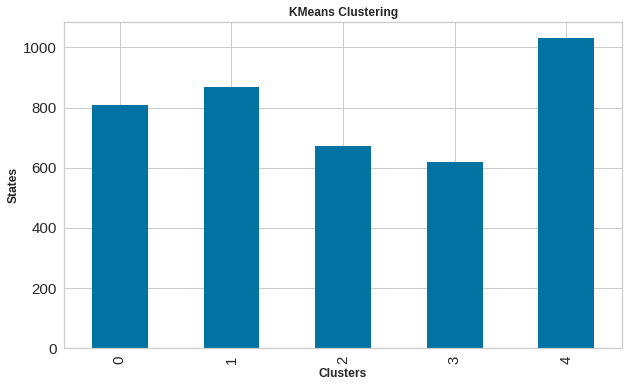

In [80]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
dataset.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('States')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [81]:
# States in cluster #0 
dataset[dataset['clusterid_Kmeans']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,3954,49519,0,3,1,1,25762,18,0,0,1522,1,1,0
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,1,0
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,1,0
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1,0


In [82]:
# States in cluster #1 
dataset[dataset['clusterid_Kmeans']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,2314,24277,0,2,1,1,5330,5,0,0,3796,0,2,1
2299,2317,27904,0,2,1,1,6622,17,0,0,3793,0,2,1
2300,2318,128620,0,2,1,1,7747,12,0,0,3789,0,2,1
2302,2320,27135,0,1,1,1,4908,11,0,0,3783,0,0,1


In [83]:
# States in cluster #2
dataset[dataset['clusterid_Kmeans']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1,2
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1,2
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1,2
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,1,2
36,37,23193,0,1,1,1,650,4,550,3,7861,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,1,2
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2


In [84]:
# States in cluster #3
dataset[dataset['clusterid_Kmeans']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2,3
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,2,3
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2,3
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,2,3
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,2,3
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2,3
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2,3
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2,3


In [85]:
# States in cluster #4
dataset[dataset['clusterid_Kmeans']==4]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,0,4
1431,1445,44665,0,1,1,1,333,2,333,2,3601,0,0,4
1549,1564,65021,0,2,1,1,10369,12,0,0,3547,0,2,4
1552,1567,6341,0,1,1,1,3658,12,0,0,3706,0,0,4
1553,1568,3641,0,1,1,1,1164,3,0,0,3603,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,0,4
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0,4
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,4


## **DBSCAN Clustering**

In [94]:
EPS = [0.22, 0.24, 0.26,0.28, 0.30,0.50,1]

for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=4)
    dbscan.fit(scaler_df)
    y=pd.DataFrame(dbscan.fit_predict(scaler_df),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    sil_score= silhouette_score(scaler_df, dbscan.labels_)
    print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.22 
  0     1690
 3      523
 2      322
 1      290
 4      275
 7      208
 6      186
 5      176
-1      132
 8      101
 9       67
 10      16
 11       9
 12       4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.22 
 0.22571660347055908
For eps = 0.24 
  0     1690
 3      531
 2      325
 1      292
 4      275
 7      209
 6      192
 5      177
-1      110
 8      101
 9       67
 10      16
 11       9
 12       5
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.24 
 0.22802044010788683
For eps = 0.26 
  0    2471
 1    1402
-1      96
 2      16
 3       9
 4       5
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.26 
 0.22896893451670544
For eps = 0.28 
  0    2474
 1    1409
-1      85
 2      16
 3       9
 4       6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.28 
 0.2331726205663462
For eps = 0.3 
  0    2475
 1    1427
-1      66
 2      16
 3       9
 4       6
Name: clusterid_DBS

When we have value of epsilon = 1, we are getting 2 clusters silhouette score is more as compared to other dbscan models

**-1 shows the noisy data points**

In [105]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(scaler_df)

DBSCAN(eps=1, min_samples=4)

In [106]:
dataset['clusterid_DBSCAN'] = dbscan.labels_
dataset.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0,1


In [107]:
dataset.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.641779,2.720413
1,1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.722485,0.908845


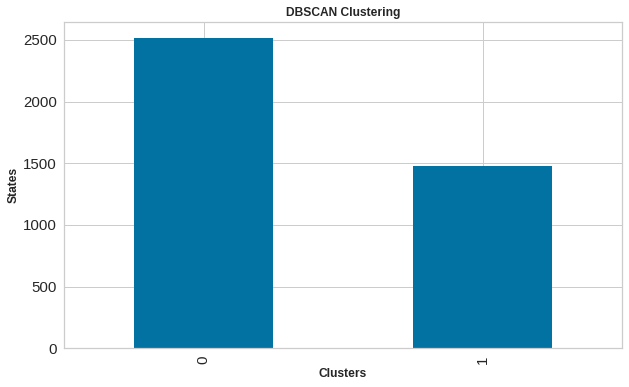

In [108]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
dataset.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [109]:
# States in cluster #0 
dataset[dataset['clusterid_DBSCAN']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,2,3,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0,4,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0,4,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,4,0


In [110]:
# States in cluster #1
dataset[dataset['clusterid_DBSCAN']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1,2,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1,0,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1,0,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1,2,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1,2,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2,1
